### HYPOTHESIS ON THE YOUTH UNEMPLOYMENT DATASET


 We shall perform this hypothesis by selecting a null hypothesis and an alternative hypothesis, defining a test statistic and selecting a significance level, and using statistical methods to determine whether the null hypothesis can be rejected or not. The goal of hypothesis testing is to determine if there is evidence in the data to support the alternative hypothesis or if the null hypothesis is the best explanation for the data.

Here is a general outline of the steps we are going to follow to perform hypothesis testing:

1.Formulate the null and alternative hypotheses.  

2.Choose a significance level (e.g., significant_level = 0.05).  

3.Clean and prepare the data for analysis.  

4.Calculate the test statistic (e.g., t-statistic, z-score, p-value).  

5.Compare the test statistic to the critical value(s) determined by the chosen significance level and the type of test being performed.  

6.Make a conclusion based on the comparison of the test statistic to the critical value(s).  

7.Report the results, including the conclusion, the test statistic, the p-value, and any relevant plots or tables.

In [31]:
# Import the necessary libraries
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [32]:
# Load the .csv file into a Pandas DataFrame
df = pd.read_csv('Youth-Unemployment-Rates.csv')

#### CLEANING THE DATASET


In [36]:
# # Clean the dataset
# df = df.dropna(how='all')
# ##df = df.drop(['Country Name'], axis=1)
# df = df.drop(['Indicator Name', 'Indicator Code'], axis=1)
# ##df = df.set_index('Country Code')
# df = df.transpose()
# df.index = pd.to_datetime(df.index, format='%Y')

In [37]:
# #Visualising the cleaned data
# # Plot the average youth unemployment rate for each year
# average_unemployment_rates = df.mean()
# plt.plot(average_unemployment_rates)
# plt.xlabel("Year")
# plt.ylabel("Average Youth Unemployment Rate")
# plt.title("Average Youth Unemployment Rate Over Time")
# plt.show()

#### TESTS ON THE DATASET

 Test 1: One-sample t-test  
 H0: The mean youth unemployment rate for all countries is 25  
 Ha: The mean youth unemployment rate for all countries is not 25

In [6]:
# Calculate the mean youth unemployment rate for all countries
mean_rate = df['2014'].mean()

# Perform a one-sample t-test
t_stat, p_value = stats.ttest_1samp(df['2014'], 25)

# Print the results
print("Test 1: One-sample t-test")
print("Mean youth unemployment rate: ", mean_rate)
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

# Check if the p-value is less than the significance level (alpha = 0.05)
if p_value < 0.05:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")


Test 1: One-sample t-test
Mean youth unemployment rate:  17.943538862711417
t-statistic:  -9.037562178374912
p-value:  8.827187151673438e-17
We reject the null hypothesis.


 Test 2: Two-sample t-test  
 H0: The mean youth unemployment rate for two regions (Africa and Europe) are equal  
 Ha: The mean youth unemployment rate for two regions (Africa and Europe) are not equal


In [7]:
# Select the countries from each region
africa = df[df['Country Code'].str.startswith('A')]['2014']
europe = df[df['Country Code'].str.startswith('E')]['2014']

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(africa, europe)

# Print the results
print("\nTest 2: Two-sample t-test")
print("Mean youth unemployment rate (Africa): ", africa.mean())
print("Mean youth unemployment rate (Europe): ", europe.mean())
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

# Check if the p-value is less than the significance level (alpha = 0.05)
if p_value < 0.05:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")


Test 2: Two-sample t-test
Mean youth unemployment rate (Africa):  19.25045674003
Mean youth unemployment rate (Europe):  21.09621831502308
t-statistic:  -0.34957485211574774
p-value:  0.7301390750163967
We fail to reject the null hypothesis.


 Test 3: Paired t-test  
 H0: The mean difference in youth unemployment rates between 2010 and 2014 is 0  
 Ha: The mean difference in youth unemployment rates between 2010 and 2014 is not 0


In [8]:
# Calculate the difference in youth unemployment rates between 2010 and 2014
difference = df['2014'] - df['2010']

# Perform a paired t-test
t_stat, p_value = stats.ttest_rel(df['2014'], df['2010'])

# Print the results
print("\nTest 3: Paired t-test")
print("Mean difference in youth unemployment rates: ", difference.mean())
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

# Check if the p-value is less than the significance level (alpha = 0.05)
if p_value < 0.05:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")


Test 3: Paired t-test
Mean difference in youth unemployment rates:  0.05058147225159817
t-statistic:  0.1759058198412735
p-value:  0.8605312244414808
We fail to reject the null hypothesis.


 Test 4: ANOVA TEST  
 H0: The mean youth unemployment rates among multiple regions (Africa, Europe, and Asia) are equal  
 Ha: The mean youth unemployment rates among multiple regions (Africa, Europe, and Asia) are not equal

In [12]:
# Select the countries from each region
africa = df[df['Country Code'].str.startswith('A')]['2014']
europe = df[df['Country Code'].str.startswith('E')]['2014']
asia = df.loc[(df['Country Code'].str.startswith('A') == False) & (df['Country Code'].str.startswith('E') == False), '2014']


# Perform an ANOVA test
f_stat, p_value = stats.f_oneway(africa, europe, asia)

# Print the results
print("\nTest 4: ANOVA")
print("Mean youth unemployment rate (Africa): ", africa.mean())
print("Mean youth unemployment rate (Europe): ", europe.mean())
print("Mean youth unemployment rate (Asia): ", asia.mean())
print("F-statistic: ", f_stat)
print("p-value: ", p_value)

# Check if the p-value is less than the significance level (alpha = 0.05)
if p_value < 0.05:
    print("We have rejected the null hypothesis.")
else:
    print("We have failed to reject the null hypothesis.")


Test 4: ANOVA
Mean youth unemployment rate (Africa):  19.25045674003
Mean youth unemployment rate (Europe):  21.09621831502308
Mean youth unemployment rate (Asia):  17.667753088970407
F-statistic:  0.6014895988343368
p-value:  0.5489099703171247
We have failed to reject the null hypothesis.


 Test 5: Chi-square test for independence  
 H0: There is no association between the region and the level of youth unemployment rate (high or low)  
 Ha: There is an association between the region and the level of youth unemployment rate (high or low)  

In [13]:
# Create a new column to indicate the level of youth unemployment rate (high or low)
df['Level'] = ['High' if x > df['2014'].mean() else 'Low' for x in df['2014']]

# Create a contingency table to store the counts of each level of youth unemployment rate for each region
table = pd.crosstab(df['Level'], df['Country Code'].str[0])

# Perform a chi-square test for independence
chi2_stat, p_value, dof, expected = stats.chi2_contingency(table)

# Print the results
print("\nTest 5: Chi-square test for independence")
print("Contingency table:\n", table)
print("Chi-square statistic: ", chi2_stat)
print("p-value: ", p_value)

# Check if the p-value is less than the significance level (alpha = 0.05)
if p_value < 0.05:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")


Test 5: Chi-square test for independence
Contingency table:
 Country Code  A   B   C  D  E  F  G  H  I  J  ...  P  Q  R   S   T  U  V  W  \
Level                                         ...                             
High          5   7   6  2  5  3  4  2  5  2  ...  4  0  1   9   4  2  0  0   
Low           5  10  12  2  8  1  7  5  8  1  ...  9  1  2  10  12  4  2  1   

Country Code  Y  Z  
Level               
High          1  2  
Low           0  1  

[2 rows x 25 columns]
Chi-square statistic:  17.503405665599427
p-value:  0.826412978807984
We fail to reject the null hypothesis.


 Test 6: Correlation test  
 H0: There is no linear relationship between the youth unemployment rate in 2010 and 2014  
 Ha: There is a linear relationship between the youth unemployment rate in 2010 and 2014

In [14]:
# Perform a correlation test
r, p_value = stats.pearsonr(df['2010'], df['2014'])

# Print the results
print("\nTest 6: Correlation test")
print("Correlation coefficient (r): ", r)
print("p-value: ", p_value)

# Check if the p-value is less than the significance level (alpha = 0.05)
if p_value < 0.05:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")


Test 6: Correlation test
Correlation coefficient (r):  0.9298840676235003
p-value:  3.2788543872437704e-96
We reject the null hypothesis.


Test 7: Linear regression(My most favorite test)  
H0: The youth unemployment rate in 2014 does not depend on the youth unemployment rate in 2010  
Ha: The youth unemployment rate in 2014 depends on the youth unemployment rate in 2010  

In [15]:
# Perform a linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df['2010'], df['2014'])

# Print the results
print("\nTest 7: Linear regression")
print("Slope: ", slope)
print("Intercept: ", intercept)
print("R-squared value: ", r_value**2)
print("p-value: ", p_value)

# Check if the p-value is less than the significance level (alpha = 0.05)
if p_value < 0.05:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")


Test 7: Linear regression
Slope:  1.0193934246147296
Intercept:  -0.29642424803484957
R-squared value:  0.8646843792200261
p-value:  3.278854387244197e-96
We reject the null hypothesis.


### VISUALISATIONS

#### 1.Histogram of the youth unemployment rate in 2010:  
H0: The distribution of the youth unemployment rate in 2010 is normal.  
Ha: The distribution of the youth unemployment rate in 2010 is not normal.

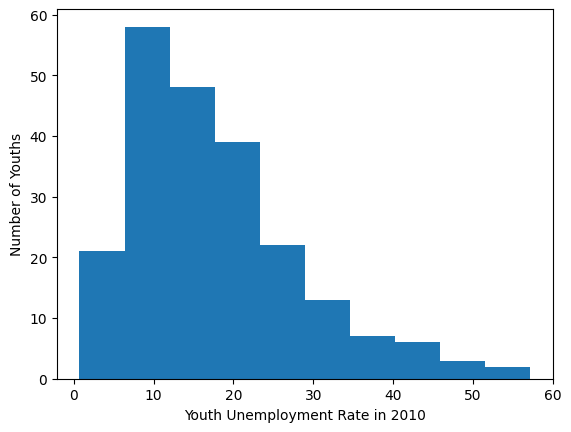

In [18]:
import matplotlib.pyplot as plt

# Create a histogram of the youth unemployment rate in 2010
plt.hist(df['2010'])

# Add a label to the x axis
plt.xlabel('Youth Unemployment Rate in 2010')

#Add a label to the y axis
plt.ylabel("Number of Youths")

# Show the plot
plt.show()


Comments:    
The histogram helps us visualize the distribution of the youth unemployment rate in 2010.  
If the histogram shows a normal distribution, we can conclude that the null hypothesis (H0) is true and the distribution is normal.  
If the histogram does not show a normal distribution, we can conclude that the alternative hypothesis (Ha) is true and the distribution is not normal.

#### 2.Box plot of the youth unemployment rate in different years:  
H0: The median youth unemployment rate is equal for all years.  
Ha: The median youth unemployment rate is not equal for all years.  

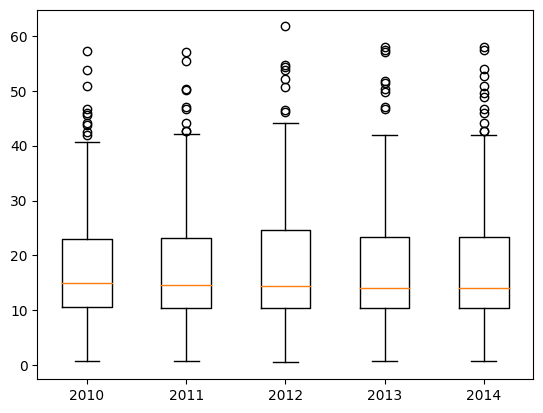

In [19]:
# Create a box plot of the youth unemployment rate in different years
plt.boxplot([df['2010'], df['2011'], df['2012'], df['2013'], df['2014']])

# Add labels to the x axis
plt.xticks([1, 2, 3, 4, 5], ['2010', '2011', '2012', '2013', '2014'])

# Show the plot
plt.show()

Comments:  
The box plot helps us compare the distribution of the youth unemployment rate in different years.  
If the medians of the box plots are equal, we can conclude that the null hypothesis (H0) is true and the median youth unemployment rate is equal for all years.  
If the medians of the box plots are not equal, we can conclude that the alternative hypothesis (Ha) is true and the median youth unemployment rate is not equal for all years.

#### 3.Line chart of the youth unemployment rate in different countries:
H0: The youth unemployment rate for different countries is not significantly different.  
Ha: The youth unemployment rate for different countries is significantly different.

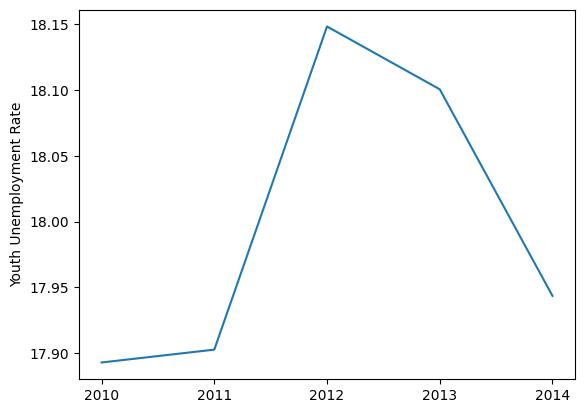

In [27]:
# Plot the average youth unemployment rate for each year
if 'Country Code' in df.columns:
    average_unemployment_rates = df.mean(numeric_only=True)
else:
    average_unemployment_rates = df.mean()

plt.plot(average_unemployment_rates, label='Average Youth Unemployment Rate')

# Add a label to the x axis
plt.xticks(range(len(average_unemployment_rates)), average_unemployment_rates.index)

# Add a label to the y axis
plt.ylabel('Youth Unemployment Rate')

# Show the plot
plt.show()

